### Aim: The dataset is hosted by city of Los Angeles named as "Metro Bike Share Trip Data". I will be analyzing the use of metro bikes in order to build a bike network that really works.

# Introduction
This dataset is a catalogue of rides taken on the LA-Metro Bike Share Network.The Metro Bike Share system makes bikes available 24/7, 365 days a year in Downtown LA, Central LA, Port of LA and the Westside. Metro Bike Share offers convenient round-the-clock access to a fleet of bicycles for short trips. Metro Bike Share is one of LA Metro's multiple public transportation options for Angelenos and visitors to get around.

Feature descriptions from https://bikeshare.metro.net/about/data/

* trip_id: Locally unique integer that identifies the trip

* duration: Length of trip in seconds

* start_time: The date/time when the trip began, presented in ISO 8601 format in local time

* end_time: The date/time when the trip ended, presented in ISO 8601 format in local time

* start_station: The station ID where the trip originated

* start_lat: The latitude of the station where the trip originated

* start_lon: The longitude of the station where the trip originated

* end_station: The station ID where the trip terminated

* end_lat: The latitude of the station where the trip terminated

* end_lon: The longitude of the station where the trip terminated

* bike_id: Locally unique integer that identifies the bike

* plan_duration: The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up)

* trip_route_category: "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips

* passholder_type: The name of the passholder's plan

Other features are not officially described by Metro Bike Share

Remaining features appear to be LA geographic information which we think is not relevant to our analysis, many of which include large amounts of missing data. So we have dropped those columns.

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

%matplotlib inline
#from Ronak_Somani_Capstone_Project_Code import distance_on_unit_sphere
#from Ronak_Somani_Capstone_Project_Code import modeling_techniques_and_prediction

# Data Extraction

In [3]:
# Read the data from the csv file
metro_bike_trip_df =  pd.read_csv("metro-bike-share-trip-data.csv")
print("Shape of the metro bike trip dataframe")
metro_bike_trip_df.shape

Shape of the metro bike trip dataframe


(132427, 22)

In [4]:
#Replacing the column name space with "_" for easier name conversion
metro_bike_trip_df.columns = metro_bike_trip_df.columns.str.replace(' ','_')
metro_bike_trip_df.head(5)

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,...,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long,Neighborhood_Councils_(Certified),Council_Districts,Zip_Codes,LA_Specific_Plans,Precinct_Boundaries,Census_Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Trip_ID                            132427 non-null  int64  
 1   Duration                           132427 non-null  int64  
 2   Start_Time                         132427 non-null  object 
 3   End_Time                           132427 non-null  object 
 4   Starting_Station_ID                132408 non-null  float64
 5   Starting_Station_Latitude          132379 non-null  float64
 6   Starting_Station_Longitude         132379 non-null  float64
 7   Ending_Station_ID                  132331 non-null  float64
 8   Ending_Station_Latitude            131376 non-null  float64
 9   Ending_Station_Longitude           131376 non-null  float64
 10  Bike_ID                            132417 non-null  float64
 11  Plan_Duration                      1316

In [6]:
print("shape:", metro_bike_trip_df.shape)

shape: (132427, 22)


In [7]:
# Changing Start and End Time values to datetime format
metro_bike_trip_df['Start_Time']=pd.to_datetime(metro_bike_trip_df['Start_Time'])
metro_bike_trip_df['End_Time']=pd.to_datetime(metro_bike_trip_df['End_Time'])
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Trip_ID                            132427 non-null  int64         
 1   Duration                           132427 non-null  int64         
 2   Start_Time                         132427 non-null  datetime64[ns]
 3   End_Time                           132427 non-null  datetime64[ns]
 4   Starting_Station_ID                132408 non-null  float64       
 5   Starting_Station_Latitude          132379 non-null  float64       
 6   Starting_Station_Longitude         132379 non-null  float64       
 7   Ending_Station_ID                  132331 non-null  float64       
 8   Ending_Station_Latitude            131376 non-null  float64       
 9   Ending_Station_Longitude           131376 non-null  float64       
 10  Bike_ID             

# Data Cleaning

In [8]:
# Finding the null values in each column
metro_bike_trip_df.isnull().sum()

Trip_ID                                   0
Duration                                  0
Start_Time                                0
End_Time                                  0
Starting_Station_ID                      19
Starting_Station_Latitude                48
Starting_Station_Longitude               48
Ending_Station_ID                        96
Ending_Station_Latitude                1051
Ending_Station_Longitude               1051
Bike_ID                                  10
Plan_Duration                           766
Trip_Route_Category                       0
Passholder_Type                           0
Starting_Lat-Long                     33805
Ending_Lat-Long                        1051
Neighborhood_Councils_(Certified)     33837
Council_Districts                     33837
Zip_Codes                             33837
LA_Specific_Plans                    116590
Precinct_Boundaries                    1099
Census_Tracts                          1099
dtype: int64

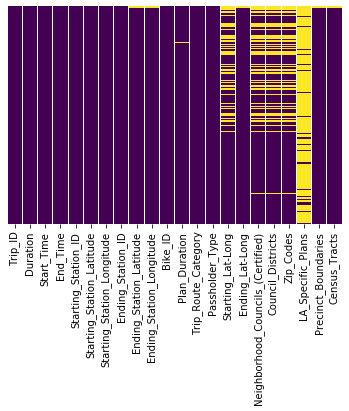

In [9]:
# Visually representing the null values of different columns using heatmap
sns.heatmap(metro_bike_trip_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# Dropping below columns due to lack of data and more of null values
metro_bike_trip_df.drop(columns=['Neighborhood_Councils_(Certified)',
                 'Council_Districts',
                 'Zip_Codes',
                 'LA_Specific_Plans',
                 'Precinct_Boundaries',
                 'Census_Tracts'],
       inplace=True)

In [11]:
# Droping the na values from the metro bike trip data
metro_bike_trip_df = metro_bike_trip_df.dropna()
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97825 entries, 2088 to 132426
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Trip_ID                     97825 non-null  int64         
 1   Duration                    97825 non-null  int64         
 2   Start_Time                  97825 non-null  datetime64[ns]
 3   End_Time                    97825 non-null  datetime64[ns]
 4   Starting_Station_ID         97825 non-null  float64       
 5   Starting_Station_Latitude   97825 non-null  float64       
 6   Starting_Station_Longitude  97825 non-null  float64       
 7   Ending_Station_ID           97825 non-null  float64       
 8   Ending_Station_Latitude     97825 non-null  float64       
 9   Ending_Station_Longitude    97825 non-null  float64       
 10  Bike_ID                     97825 non-null  float64       
 11  Plan_Duration               97825 non-null  float6

In [12]:
# Change format of station and bike ID's to integer.
metro_bike_trip_df['Starting_Station_ID'] = metro_bike_trip_df.Starting_Station_ID.astype(int)
metro_bike_trip_df['Ending_Station_ID'] = metro_bike_trip_df.Ending_Station_ID.astype(int)
metro_bike_trip_df['Bike_ID'] = metro_bike_trip_df.Bike_ID.astype(int)
metro_bike_trip_df['Start_Time'] = metro_bike_trip_df.Start_Time.astype('datetime64[ns]')

# Extract the weekday integer from Start_Time timestamp to the Weekday
# Had to use lambda expressions to apply the weekday to each object since it doesnt function on a series object
df_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
metro_bike_trip_df['Weekday'] = metro_bike_trip_df.apply(lambda x:
                                                        df_weekday[x['Start_Time'].weekday()], axis = 1)




metro_bike_trip_df.head(10)

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Bike_ID,Plan_Duration,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long,Weekday
2088,2023364,1980,2016-07-08 09:24:00,2016-07-08 09:57:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,5833,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02...",Friday
2089,2027211,180,2016-07-08 10:40:00,2016-07-08 10:43:00,4108,0.000000,0.00000,4108,0.000000,0.00000,6065,30.0,Round Trip,Monthly Pass,"{'longitude': '0.0', 'latitude': '0.0'}","{'longitude': '0.0', 'latitude': '0.0'}",Friday
2090,2035311,780,2016-07-08 12:42:00,2016-07-08 12:55:00,3029,34.048851,-118.24642,3029,34.048851,-118.24642,6011,0.0,Round Trip,Walk-up,"{'longitude': '-118.24642', 'latitude': '34.04...","{'longitude': '-118.24642', 'latitude': '34.04...",Friday
2091,2182651,4440,2016-07-09 19:08:00,2016-07-09 20:22:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,6623,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02...",Saturday
2092,2286870,5220,2016-07-10 10:56:00,2016-07-10 12:23:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,6210,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02...",Sunday
2093,2492936,9600,2016-07-11 15:08:00,2016-07-11 17:48:00,4108,0.000000,0.00000,4108,0.000000,0.00000,6286,30.0,Round Trip,Monthly Pass,"{'longitude': '0.0', 'latitude': '0.0'}","{'longitude': '0.0', 'latitude': '0.0'}",Monday
2094,2547346,900,2016-07-11 23:52:00,2016-07-12 00:07:00,3026,34.063179,-118.24588,3026,34.063179,-118.24588,6491,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24588', 'latitude': '34.06...","{'longitude': '-118.24588', 'latitude': '34.06...",Monday
2095,2630413,120,2016-07-12 11:53:00,2016-07-12 11:55:00,4108,0.000000,0.00000,4108,0.000000,0.00000,6054,30.0,Round Trip,Monthly Pass,"{'longitude': '0.0', 'latitude': '0.0'}","{'longitude': '0.0', 'latitude': '0.0'}",Tuesday
2096,2655087,180,2016-07-12 14:00:00,2016-07-12 14:03:00,3029,34.048851,-118.24642,3029,34.048851,-118.24642,6309,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24642', 'latitude': '34.04...","{'longitude': '-118.24642', 'latitude': '34.04...",Tuesday
2097,2778431,1620,2016-07-13 11:23:00,2016-07-13 11:50:00,4108,0.000000,0.00000,4108,0.000000,0.00000,6092,30.0,Round Trip,Monthly Pass,"{'longitude': '0.0', 'latitude': '0.0'}","{'longitude': '0.0', 'latitude': '0.0'}",Wednesday


In [13]:
# Now we will find the total number of stations and total number of bikes 
print("Total number of Starting stations:", metro_bike_trip_df.Starting_Station_ID.nunique())
print("Total number of Ending stations:", metro_bike_trip_df.Ending_Station_ID.nunique())
print("Total number of bikes:",metro_bike_trip_df.Bike_ID.nunique())

Total number of Starting stations: 64
Total number of Ending stations: 64
Total number of bikes: 762


# Performing Exploratory Data Analysis for the Bike Trip Data

* ### Finding the trip route category and ploting it in the form of bar graph

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Trip Categories'),
 Text(0.5, 1.0, 'Comparison of Overall Trip Route categories in the available dataset')]

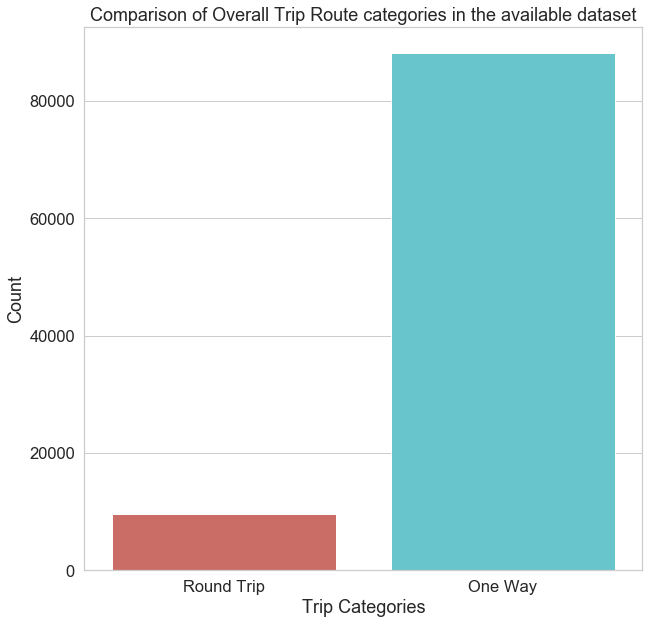

In [14]:
# Set style to whitegrid for better readability
sns.set(style="whitegrid", font_scale=1.5)

# Plot two countplot with 
# x axis as Trip Route Category eg, One Way or Round Trip
# y axis as count of trips
# Plot 1 overall comparison of Trip Route Category
# Plot 2 weekday Trip Route Category
fig, (ax1) = plt.subplots(nrows=1, sharey=True, figsize=(10, 10))

sns.countplot(
    x = "Trip_Route_Category", 
    data = metro_bike_trip_df, 
    ax = ax1,
    palette = "hls").set(
        title = 'Comparison of Overall Trip Route categories in the available dataset', 
        xlabel = 'Trip Categories', 
        ylabel = 'Count')

> This provides us a insight into the general tendency of a rider.  The EDA points to the likelyhood that a higher percentage of riders wants to use the bike for a one way trip.

* ### Finding the trip route category per weekday and ploting it in the form of bar graph

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weekday'),
 Text(0.5, 1.0, 'Comparison of Weekday Trip Count in the available dataset')]

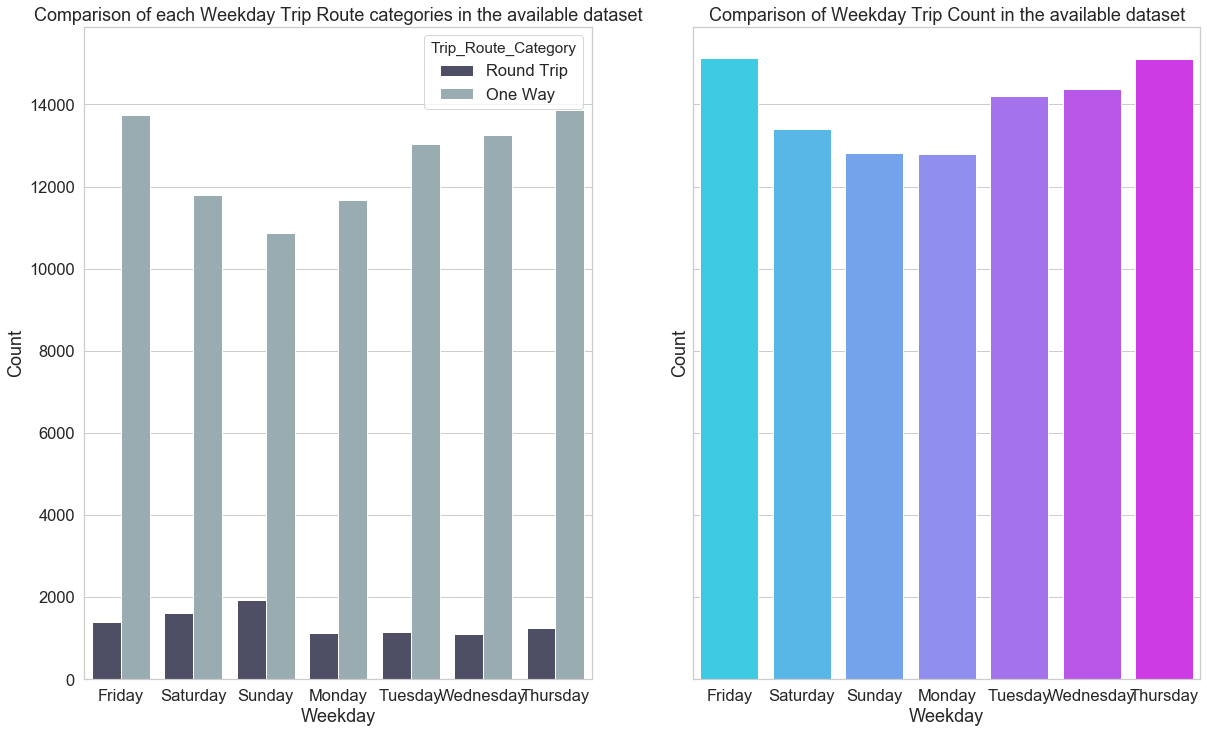

In [15]:
# Set style to whitegrid for better readability
sns.set(style="whitegrid", font_scale=1.5)

# Plot two countplot with 
# x axis as Trip Route Category eg, One Way or Round Trip
# y axis as count of trips
# Plot 1 weekday Trip Route Category
# Plot 2 weekday trip count plots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 12))

# Plot a countplot with 
# x axis as Weekday 
# y axis as count of trips per weekday
# Trip Route Category eg, One Way or Round Trip
sns.countplot(
    x = "Weekday",
    hue = "Trip_Route_Category", 
    data = metro_bike_trip_df, 
    ax = ax1,
    palette = "bone").set(
        title = 'Comparison of each Weekday Trip Route categories in the available dataset', 
        xlabel = 'Weekday', 
        ylabel = 'Count')

sns.countplot(
    x = "Weekday",
    data = metro_bike_trip_df, 
    ax = ax2,
    palette = "cool").set(
        title = 'Comparison of Weekday Trip Count in the available dataset', 
        xlabel = 'Weekday', 
        ylabel = 'Count')

> The above graph also supports the previous analysis that even during weekdays the general tendency of preferring One Way trip over Round Trip by the customers.  However, we also see a slight increase of Round Trip riders during weekends, i.e. Saturday and Sunday and a similar drop in the One Way riders.

> This also could be due to the fact that overal number of riders reduced during weekends since some regular riders may prefer to stay home compared to a regular weekday while the tourists or younger population would prefer to go out and chill.

> It would make sense to plot out a weeday rider count comparison to give a better idea about rider count changes during the week.  So hence the second graph.  

> The second graph provide a little bit more view into a drop of rider counts during Sunday.  But the interesting thing to note here is that there is drop in rider count on Monday also.

* ### Business hours periods that bike rentals are at peak. 
* ### Finding the most popular pick up time of any bike.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Drop Window'),
 Text(0.5, 1.0, 'Comparison of Peak Drop Windows')]

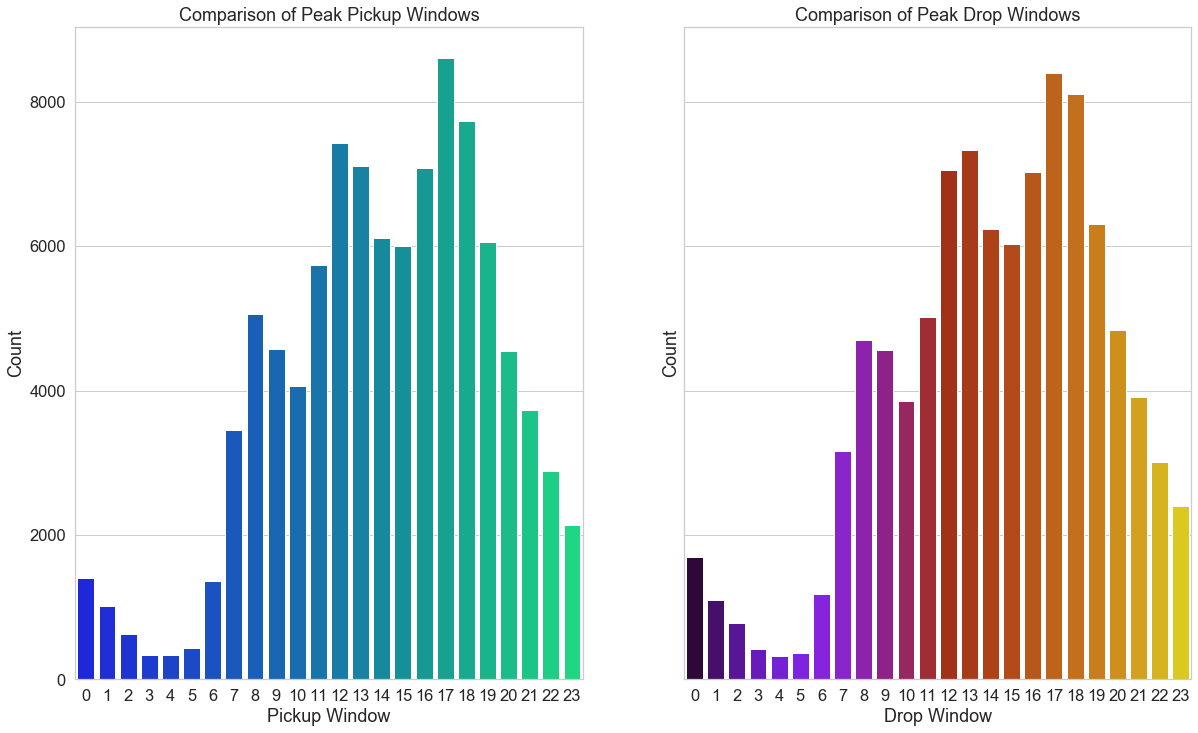

In [16]:
# Prepare the hourly window of pickup and drop
metro_bike_trip_df['Pickup_Window'] = metro_bike_trip_df['Start_Time'].dt.hour
metro_bike_trip_df['Drop_Window'] = metro_bike_trip_df['End_Time'].dt.hour

# Set style to whitegrid for better readability
sns.set(style="whitegrid", font_scale=1.5)

# Plot two countplot with 
# x axis as Trip Route Category eg, One Way or Round Trip
# y axis as count of trips
# Plot 1 weekday Trip Route Category
# Plot 2 weekday trip count plots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 12))

# Plot a countplot with 
# x axis as Weekday 
# y axis as count of trips per weekday
# Trip Route Category eg, One Way or Round Trip
sns.countplot(
    x = "Pickup_Window",
    data = metro_bike_trip_df, 
    ax = ax1,
    palette = "winter").set(
        title = 'Comparison of Peak Pickup Windows', 
        xlabel = 'Pickup Window', 
        ylabel = 'Count')

sns.countplot(
    x = "Drop_Window",
    data = metro_bike_trip_df, 
    ax = ax2,
    palette = "gnuplot").set(
        title = 'Comparison of Peak Drop Windows', 
        xlabel = 'Drop Window', 
        ylabel = 'Count')

> The above analysis give us insight regarding the peak pickup and drop windows.  The peak times for both pickup and drop is a 4 hour window between evening 4:00 P.M. to 7:00 P.M. and there is also 2 hour peak during lunch hours of 11:00 A.M. to 12:00 P.M.

* ### Finding the maximum and minimum trip duration

In [17]:
# Prepare the dataframe to contain total trip duration in seconds that can be used to find the max duration trip and min duration trip
metro_bike_trip_df['Trip_Duration'] = metro_bike_trip_df.End_Time - metro_bike_trip_df.Start_Time
metro_bike_trip_df['Trip_Duration_Seconds'] = metro_bike_trip_df.Trip_Duration.dt.total_seconds()

> Following is the maximum duration trip from the dataset.

In [18]:
metro_bike_trip_df.nlargest(1, ['Trip_Duration_Seconds'], keep = 'all')

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,...,Plan_Duration,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long,Weekday,Pickup_Window,Drop_Window,Trip_Duration,Trip_Duration_Seconds
123643,5082350,86400,2016-08-15 21:13:00,2016-08-21 13:41:00,3010,34.037048,-118.25487,3055,34.044159,-118.25158,...,30.0,One Way,Monthly Pass,"{'longitude': '-118.25487', 'latitude': '34.03...","{'longitude': '-118.25158', 'latitude': '34.04...",Monday,21,13,5 days 16:28:00,491280.0


> Following are the minimum duration trip from the dataset.

In [19]:
metro_bike_trip_df.nsmallest(1, ['Trip_Duration_Seconds'], keep = 'all')

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,...,Plan_Duration,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long,Weekday,Pickup_Window,Drop_Window,Trip_Duration,Trip_Duration_Seconds
2415,12998065,60,2016-11-10 21:28:00,2016-11-10 21:29:00,3064,34.046810,-118.256981,3064,34.046810,-118.256981,...,0.0,Round Trip,Walk-up,"{'longitude': '-118.256981', 'latitude': '34.0...","{'longitude': '-118.256981', 'latitude': '34.0...",Thursday,21,21,00:01:00,60.0
2846,11586730,60,2016-10-28 13:58:00,2016-10-28 13:59:00,3064,34.046810,-118.256981,3064,34.046810,-118.256981,...,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.256981', 'latitude': '34.0...","{'longitude': '-118.256981', 'latitude': '34.0...",Friday,13,13,00:01:00,60.0
3021,15124543,60,2016-12-04 23:32:00,2016-12-04 23:33:00,3030,34.051941,-118.243530,3042,34.049301,-118.238808,...,30.0,One Way,Monthly Pass,"{'longitude': '-118.24353', 'latitude': '34.05...","{'longitude': '-118.238808', 'latitude': '34.0...",Sunday,23,23,00:01:00,60.0
3386,16385712,60,2016-12-20 11:59:00,2016-12-20 12:00:00,3069,34.050880,-118.248253,3069,34.050880,-118.248253,...,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.248253', 'latitude': '34.0...","{'longitude': '-118.248253', 'latitude': '34.0...",Tuesday,11,12,00:01:00,60.0
3438,16533965,60,2016-12-22 17:13:00,2016-12-22 17:14:00,3056,34.037460,-118.265381,3047,34.039982,-118.266403,...,30.0,One Way,Monthly Pass,"{'longitude': '-118.265381', 'latitude': '34.0...","{'longitude': '-118.266403', 'latitude': '34.0...",Thursday,17,17,00:01:00,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76226,15661164,60,2016-12-11 01:25:00,2016-12-11 01:26:00,3016,34.052898,-118.241562,3030,34.051941,-118.243530,...,30.0,One Way,Monthly Pass,"{'longitude': '-118.241562', 'latitude': '34.0...","{'longitude': '-118.24353', 'latitude': '34.05...",Sunday,1,1,00:01:00,60.0
76456,11369691,60,2016-10-26 07:07:00,2016-10-26 07:08:00,3055,34.044159,-118.251579,3055,34.044159,-118.251579,...,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.251579', 'latitude': '34.0...","{'longitude': '-118.251579', 'latitude': '34.0...",Wednesday,7,7,00:01:00,60.0
76488,10098199,60,2016-10-15 13:54:00,2016-10-15 13:55:00,3074,34.044170,-118.261169,3034,34.042061,-118.263382,...,30.0,One Way,Monthly Pass,"{'longitude': '-118.261169', 'latitude': '34.0...","{'longitude': '-118.263382', 'latitude': '34.0...",Saturday,13,13,00:01:00,60.0
76760,8554496,60,2016-10-02 15:54:00,2016-10-02 15:55:00,3031,34.044701,-118.252441,3031,34.044701,-118.252441,...,0.0,Round Trip,Walk-up,"{'longitude': '-118.252441', 'latitude': '34.0...","{'longitude': '-118.252441', 'latitude': '34.0...",Sunday,15,15,00:01:00,60.0


* ### Popular start station and end station


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Ending Station ID'),
 Text(0.5, 1.0, 'Comparison of Top 10 Ending Stations')]

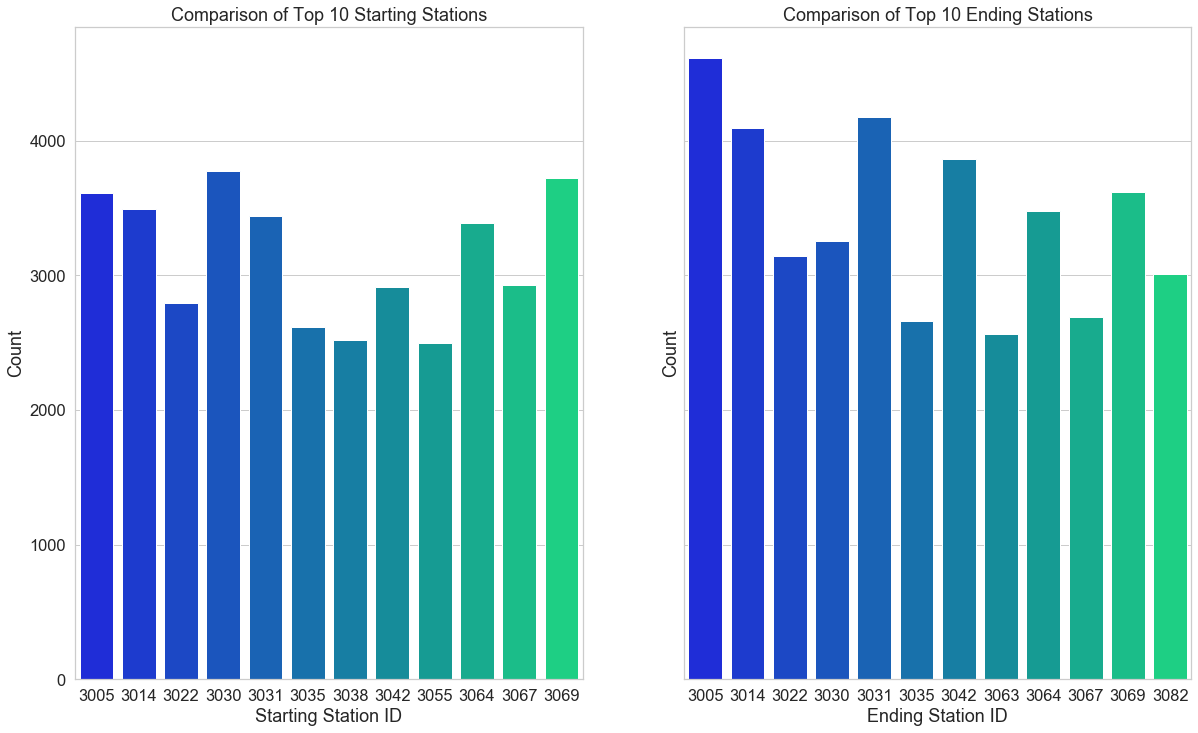

In [20]:
# Prepare data with station counts
ss_count = metro_bike_trip_df.groupby(['Starting_Station_ID']).size().to_frame('ss_count')
es_count = metro_bike_trip_df.groupby(['Ending_Station_ID']).size().to_frame('es_count')
stations_count = pd.merge(ss_count, es_count, right_index=True, left_index=True)
stations_count['Station_ID'] = stations_count.index

# Set style to whitegrid for better readability
sns.set(style="whitegrid", font_scale=1.5)

# Plot two countplot with 
# x axis as Trip Route Category eg, One Way or Round Trip
# y axis as count of trips
# Plot 1 weekday Trip Route Category
# Plot 2 weekday trip count plots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 12))

# Plot a countplot with 
# x axis as Weekday 
# y axis as count of trips per weekday
# Trip Route Category eg, One Way or Round Trip
sns.barplot(
    x = "Station_ID",
    y = "ss_count",
    data = stations_count.nlargest(12, ["ss_count"], keep = "all"),
    ax = ax1,
    palette = "winter").set(
        title = 'Comparison of Top 10 Starting Stations', 
        xlabel = 'Starting Station ID', 
        ylabel = 'Count')

sns.barplot(
    x = "Station_ID",
    y = "es_count",
    data = stations_count.nlargest(12, ["es_count"], keep = "all"),
    ax = ax2,
    palette = "winter").set(
        title = 'Comparison of Top 10 Ending Stations', 
        xlabel = 'Ending Station ID', 
        ylabel = 'Count')

> Top pickup station

In [21]:
stations_count.nlargest(1, ["ss_count"], keep = "all")

,ss_count,es_count,Station_ID
Starting_Station_ID,,,
3030,3778,3255,3030


> Top Drop station

In [22]:
stations_count.nlargest(1, ["es_count"], keep = "all")

,ss_count,es_count,Station_ID
Starting_Station_ID,,,
3005,3613,4615,3005


> The above group give us an indication that the station id 3030, 3069 and 3005 are top 3 favorites as a pickup location, while the station 3005, 3014 and 3031 are the top 3 drop locations.  The commonality is 3005 station id that get very heavy traffic of bike pick and drops indication a high churn and demand in that one particular location in addition to the other top stations.

> Due to lack of proper station identification, we are not able to provide station names in this analysis.

* ### Busiest Bike by Times
* ### Visual of most used bike based on Number of Trips - WHICH BIKE IS USED THE MOST

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Starting Station ID'),
 Text(0.5, 1.0, 'Comparison of Top 10 Starting Stations')]

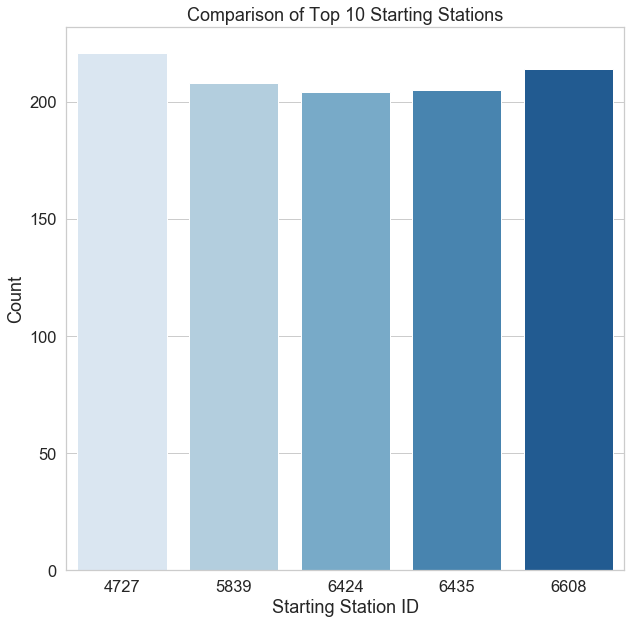

In [27]:
# Prepare data with station counts
bike_count = metro_bike_trip_df.groupby(['Bike_ID']).size().to_frame('bike_count')
bike_count['Bike_ID'] = bike_count.index

# Set style to whitegrid for better readability
sns.set(style="whitegrid", font_scale=1.5)

# Plot two countplot with 
# x axis as Trip Route Category eg, One Way or Round Trip
# y axis as count of trips
# Plot 1 weekday Trip Route Category
# Plot 2 weekday trip count plots
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(10, 10))

# Plot a countplot with 
# x axis as Weekday 
# y axis as count of trips per weekday
# Trip Route Category eg, One Way or Round Trip
sns.barplot(
    x = "Bike_ID",
    y = "bike_count",
    data = bike_count.nlargest(5, ["bike_count"], keep = "all"),
    ax = ax1,
    palette = "Blues").set(
        title = 'Comparison of Top 10 Starting Stations', 
        xlabel = 'Starting Station ID', 
        ylabel = 'Count')

In [24]:
bike_count.nlargest(1, ["bike_count"], keep = "all")

,bike_count,Bike_ID
Bike_ID,,
4727,221,4727


> Based on the top 5 used bikes graph and the above statements, we get to see that 4727 bike id is the most used bike amoung all the other bikes.  This has been used 221 times.